In [2]:
import pandas as pd
import time
import numpy as np
import sys
import argparse
import json
import random
import re
import string
import pandas as pd
import time

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, classification_report,f1_score
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fake_generate = "Computer_Generate/test set contenente fake (generate) e real.csv"
fake_reali = "Human_Written/test set contenente fake (reali) e real.csv"

In [4]:
def split_dataframe(file):
    df = pd.read_csv(file,sep=";")
    df = df.sample(frac=1).reset_index(drop=True)

    df_GPT = df.drop(labels=["Titolo", "Contenuto", "ID"], axis=1)

    return df_GPT

In [5]:
df_GPT_generate = split_dataframe(fake_generate)
df_GPT_generate

,Label,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
145,1,0
146,1,1
147,1,1
148,0,0


In [6]:
df_GPT_reali = split_dataframe(fake_reali)
df_GPT_reali

,Label,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
95,0,1
96,1,1
97,0,0
98,1,1


# Confusion Matrix

In [7]:
def conf_matrix(y_true, y_pred, model, tipo):
    path_result = "Result/"
    # path_result = f"{path}Result/"

    Accuracy = metrics.accuracy_score(y_true, y_pred)
    Precision = metrics.precision_score(y_true, y_pred, labels=["Real", "Fake"])
    Sensitivity_recall = metrics.recall_score(y_true, y_pred, labels=["Real", "Fake"])
    F1_score = metrics.f1_score(y_true, y_pred, labels=["Real", "Fake"])

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["Real", "Fake"])

    plt.rcParams["figure.figsize"] = (10,10)

    cm_display.plot(cmap=plt.cm.Greens, colorbar=False)
    plt.xticks(rotation = 90)

    print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall, "F1_score":F1_score})
    plt.tight_layout()

    os.makedirs(f"{path_result}{model}/{tipo}", exist_ok=True)
    plt.savefig(f"{path_result}{model}/{tipo}/confusion-matrix_{tipo}_{model}.pdf")

    evaluation_report = classification_report(y_true, y_pred, labels=[0,1], target_names=["Real","Fake"])
    print(evaluation_report)

    with open(f"{path_result}{model}/{tipo}/{tipo}_predictions_{model}.txt", "w") as f:
      f.write(f"{evaluation_report}\nMetrics:\nAccuracy_score: {Accuracy}\nPrecision_score: {Precision}\nRecall_score: {Sensitivity_recall}\nF1_Score: {F1_score}")

    print(f"{path_result}{model}/{tipo}/{tipo}_predictions_{model}.txt")

# GPT

{'Accuracy': 0.6933333333333334, 'Precision': 0.7755102040816326, 'Sensitivity_recall': 0.76, 'F1_score': 0.7676767676767676}
              precision    recall  f1-score   support

        Real       0.54      0.56      0.55        50
        Fake       0.78      0.76      0.77       100

    accuracy                           0.69       150
   macro avg       0.66      0.66      0.66       150
weighted avg       0.70      0.69      0.69       150

Result/Best_ChatGPT/fake_generate/fake_generate_predictions_Best_ChatGPT.txt


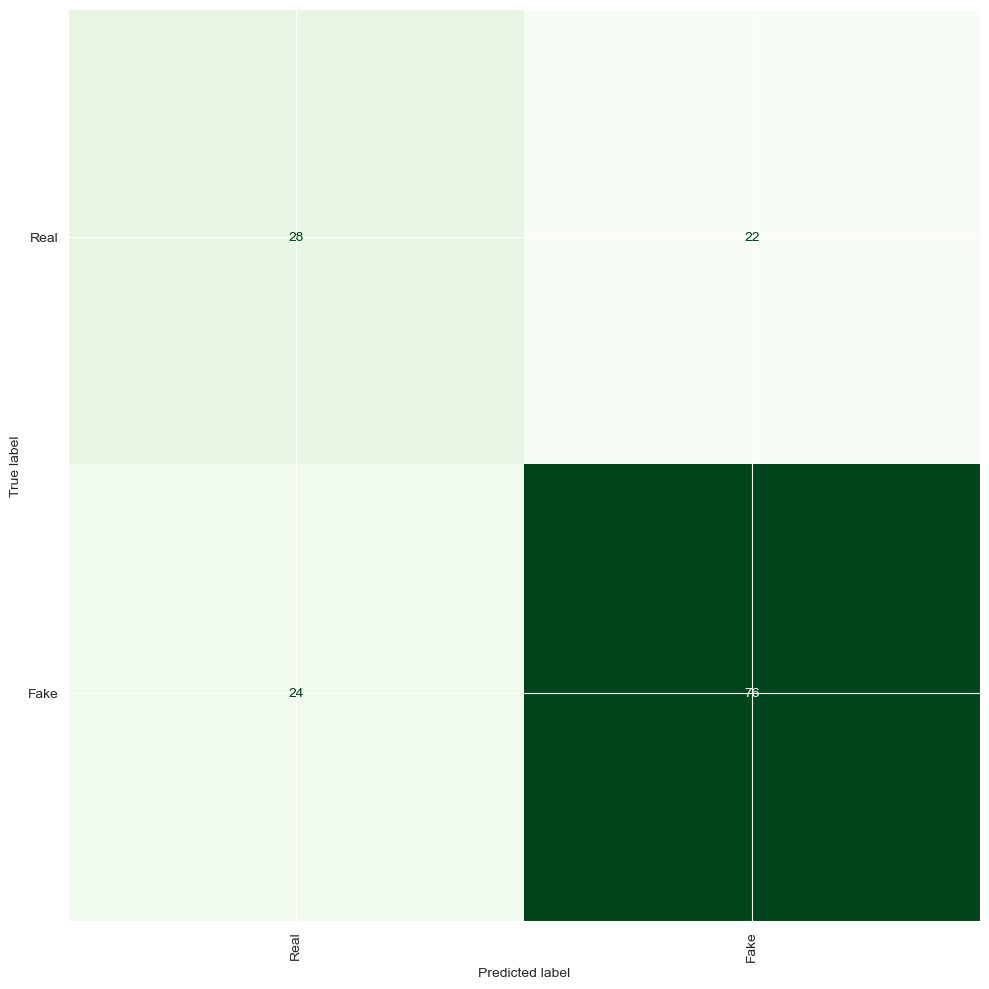

In [8]:
conf_matrix(y_true= df_GPT_generate["Label"], y_pred= df_GPT_generate["Predicted"], model= "Best_ChatGPT", tipo="fake_generate")

{'Accuracy': 0.78, 'Precision': 0.7121212121212122, 'Sensitivity_recall': 0.94, 'F1_score': 0.8103448275862069}
              precision    recall  f1-score   support

        Real       0.91      0.62      0.74        50
        Fake       0.71      0.94      0.81        50

    accuracy                           0.78       100
   macro avg       0.81      0.78      0.77       100
weighted avg       0.81      0.78      0.77       100

Result/Best_ChatGPT/real_generate/real_generate_predictions_Best_ChatGPT.txt


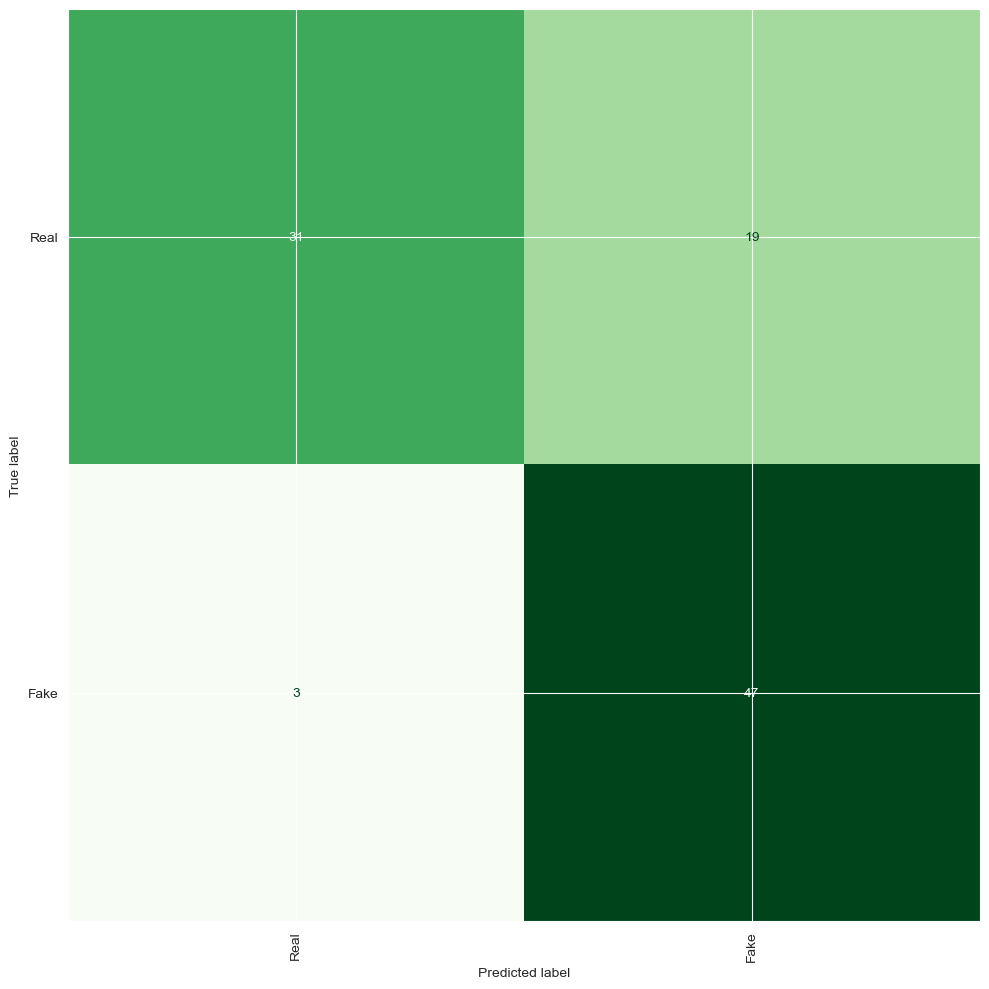

In [9]:
conf_matrix(y_true= df_GPT_reali["Label"], y_pred= df_GPT_reali["Predicted"], model= "Best_ChatGPT", tipo="real_generate")